<a href="https://colab.research.google.com/github/Biruk-gebru/Causal-Gene-Prediction-and-Validation-with-LLMs/blob/main/Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# Install necessary packages
!pip install requests pandas biopython goatools


In [59]:
import requests
import pandas as pd
from io import StringIO

# FIXED: No leading newline before <?xml ...
biomart_query = '''<?xml version="1.0" encoding="UTF-8"?>
<!DOCTYPE Query>
<Query virtualSchemaName = "default" formatter = "TSV" header = "1" uniqueRows = "1" count = "" datasetConfigVersion = "0.6" >
    <Dataset name = "hsapiens_gene_ensembl" interface = "default" >
        <Attribute name = "ensembl_gene_id" />
        <Attribute name = "external_gene_name" />
        <Attribute name = "description" />
        <Attribute name = "chromosome_name" />
        <Attribute name = "start_position" />
        <Attribute name = "end_position" />
        <Attribute name = "strand" />
    </Dataset>
</Query>
'''

# Request data from BioMart
response = requests.post("https://www.ensembl.org/biomart/martservice", data={"query": biomart_query})
response.raise_for_status()

# Load into DataFrame
df = pd.read_csv(StringIO(response.text), sep='\t')
print("✅ Successfully fetched gene data. Columns:", df.columns.tolist())

# Rename columns for clarity
df.columns = [
    'ensembl_gene_id',
    'gene_name',
    'description',
    'chromosome',
    'start',
    'end',
    'strand'
]

# Display sample
df.head()


✅ Successfully fetched gene data. Columns: ['Gene stable ID', 'Gene name', 'Gene description', 'Chromosome/scaffold name', 'Gene start (bp)', 'Gene end (bp)', 'Strand']


,ensembl_gene_id,gene_name,description,chromosome,start,end,strand
0,ENSG00000210049,MT-TF,mitochondrially encoded tRNA-Phe (UUU/C) [Sour...,MT,577,647,1
1,ENSG00000211459,MT-RNR1,mitochondrially encoded 12S rRNA [Source:HGNC ...,MT,648,1601,1
2,ENSG00000210077,MT-TV,mitochondrially encoded tRNA-Val (GUN) [Source...,MT,1602,1670,1
3,ENSG00000210082,MT-RNR2,mitochondrially encoded 16S rRNA [Source:HGNC ...,MT,1671,3229,1
4,ENSG00000209082,MT-TL1,mitochondrially encoded tRNA-Leu (UUA/G) 1 [So...,MT,3230,3304,1


In [60]:
import pandas as pd
import requests
from io import StringIO

# Updated HGNC TSV file URL
url = "https://storage.googleapis.com/public-download-files/hgnc/tsv/tsv/hgnc_complete_set.txt"

# Fetch the data
response = requests.get(url)
response.raise_for_status()  # Raise an error for bad status codes

# Read the TSV content into a pandas DataFrame
hgnc_df = pd.read_csv(StringIO(response.text), sep="\t")

# Display the first few rows
print("✅ HGNC data loaded successfully!")
print(hgnc_df.columns.tolist())
hgnc_df.head()


✅ HGNC data loaded successfully!
['hgnc_id', 'symbol', 'name', 'locus_group', 'locus_type', 'status', 'location', 'location_sortable', 'alias_symbol', 'alias_name', 'prev_symbol', 'prev_name', 'gene_group', 'gene_group_id', 'date_approved_reserved', 'date_symbol_changed', 'date_name_changed', 'date_modified', 'entrez_id', 'ensembl_gene_id', 'vega_id', 'ucsc_id', 'ena', 'refseq_accession', 'ccds_id', 'uniprot_ids', 'pubmed_id', 'mgd_id', 'rgd_id', 'lsdb', 'cosmic', 'omim_id', 'mirbase', 'homeodb', 'snornabase', 'bioparadigms_slc', 'orphanet', 'pseudogene.org', 'horde_id', 'merops', 'imgt', 'iuphar', 'kznf_gene_catalog', 'mamit-trnadb', 'cd', 'lncrnadb', 'enzyme_id', 'intermediate_filament_db', 'rna_central_id', 'lncipedia', 'gtrnadb', 'agr', 'mane_select', 'gencc']


<ipython-input-60-f338bf9daa4d>:13: DtypeWarning: Columns (32,34,38,40,50) have mixed types. Specify dtype option on import or set low_memory=False.
  hgnc_df = pd.read_csv(StringIO(response.text), sep="\t")


,hgnc_id,symbol,name,locus_group,locus_type,status,location,location_sortable,alias_symbol,alias_name,...,cd,lncrnadb,enzyme_id,intermediate_filament_db,rna_central_id,lncipedia,gtrnadb,agr,mane_select,gencc
0,HGNC:5,A1BG,alpha-1-B glycoprotein,protein-coding gene,gene with protein product,Approved,19q13.43,19q13.43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HGNC:5,ENST00000263100.8|NM_130786.4,NaN
1,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,non-coding RNA,"RNA, long non-coding",Approved,19q13.43,19q13.43,FLJ23569,NaN,...,NaN,NaN,NaN,NaN,URS00007E4F6E,A1BG-AS1,NaN,HGNC:37133,NaN,NaN
2,HGNC:24086,A1CF,APOBEC1 complementation factor,protein-coding gene,gene with protein product,Approved,10q11.23,10q11.23,ACF|ASP|ACF64|ACF65|APOBEC1CF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HGNC:24086,ENST00000373997.8|NM_014576.4,NaN
3,HGNC:7,A2M,alpha-2-macroglobulin,protein-coding gene,gene with protein product,Approved,12p13.31,12p13.31,FWP007|S863-7|CPAMD5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HGNC:7,ENST00000318602.12|NM_000014.6,HGNC:7
4,HGNC:27057,A2M-AS1,A2M antisense RNA 1,non-coding RNA,"RNA, long non-coding",Approved,12p13.31,12p13.31,NaN,NaN,...,NaN,NaN,NaN,NaN,URS00001F234A,A2M-AS1,NaN,HGNC:27057,NaN,NaN


In [61]:
import requests

go_url = "http://current.geneontology.org/annotations/goa_human.gaf.gz"
response = requests.get(go_url)
with open("goa_human.gaf.gz", "wb") as f:
    f.write(response.content)
print("✅ GOA data downloaded successfully.")


✅ GOA data downloaded successfully.


In [62]:
import gzip

go_annotations = []

with gzip.open("goa_human.gaf.gz", "rt") as f:
    for line in f:
        if line.startswith("!"):
            continue  # Skip header/comments
        fields = line.strip().split('\t')
        if len(fields) > 6:
            gene_symbol = fields[2]
            go_term = fields[4]
            evidence = fields[6]
            go_annotations.append((gene_symbol, go_term, evidence))

print(f"✅ Parsed {len(go_annotations)} GO annotations.")


✅ Parsed 969176 GO annotations.


In [63]:
reactome_url = "https://reactome.org/download/current/ReactomePathways.gmt.zip"
response = requests.get(reactome_url)

with open("ReactomePathways.gmt.zip", "wb") as f:
    f.write(response.content)

print("✅ Reactome pathways downloaded.")


✅ Reactome pathways downloaded.


In [64]:
import zipfile

with zipfile.ZipFile("ReactomePathways.gmt.zip", "r") as zip_ref:
    zip_ref.extractall("reactome_data")

# Parse GMT
pathway_genes = {}

with open("reactome_data/ReactomePathways.gmt", "r") as f:
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) > 2:
            pathway_name = parts[0]
            genes = parts[2:]
            pathway_genes[pathway_name] = genes

print(f"✅ Parsed {len(pathway_genes)} Reactome pathways.")


✅ Parsed 2751 Reactome pathways.


In [65]:
opentargets_url = "https://ftp.ebi.ac.uk/pub/databases/opentargets/platform/23.09/output/etl/json/disease_to_gene_evidence.json.gz"
response = requests.get(opentargets_url)

with open("disease_to_gene_evidence.json.gz", "wb") as f:
    f.write(response.content)

print("✅ OpenTargets gene-trait evidence downloaded.")


✅ OpenTargets gene-trait evidence downloaded.


In [66]:
# Unique gene symbols from all sources
genes_go = set([g for g, _, _ in go_annotations])
genes_pathway = set(g for genes in pathway_genes.values() for g in genes)
genes_all = sorted(list(genes_go.union(genes_pathway)))

print(f"🧬 Total unique genes found: {len(genes_all)}")


🧬 Total unique genes found: 45133


In [67]:
go_terms = sorted(list(set(go for _, go, _ in go_annotations)))
go_term_to_idx = {go: idx for idx, go in enumerate(go_terms)}


In [68]:
import numpy as np
from collections import defaultdict

# Create a mapping from gene to list of its GO terms
gene_to_gos = defaultdict(list)
for g, go, _ in go_annotations:
    gene_to_gos[g].append(go)

gene_to_go_vector = {}

for gene in genes_all:
    go_vec = np.zeros(len(go_terms), dtype=int)
    for go in gene_to_gos.get(gene, []):
        if go in go_term_to_idx:
            go_vec[go_term_to_idx[go]] = 1
    gene_to_go_vector[gene] = go_vec


In [69]:
print(f"Number of genes: {len(genes_all)}")
print(f"Number of GO annotations: {len(go_annotations)}")
print(f"Number of GO terms: {len(go_terms)}")


Number of genes: 45133
Number of GO annotations: 969176
Number of GO terms: 18902


In [70]:
import numpy as np
from collections import defaultdict

# Create a mapping from gene to list of its GO terms
gene_to_gos = defaultdict(list)
for g, go, _ in go_annotations:
    gene_to_gos[g].append(go)

gene_to_go_vector = {}

for gene in genes_all:
    go_vec = np.zeros(len(go_terms), dtype=int)
    for go in gene_to_gos.get(gene, []):
        if go in go_term_to_idx:
            go_vec[go_term_to_idx[go]] = 1
    gene_to_go_vector[gene] = go_vec


In [71]:
print(type(pathway_genes), len(pathway_genes))
print(type(genes_all), len(genes_all))


<class 'dict'> 2751
<class 'list'> 45133


In [72]:
pathway_names = sorted(list(pathway_genes.keys()))
print(pathway_names[:5])  # just check first few pathways

pathway_index = {p: i for i, p in enumerate(pathway_names)}
print(list(pathway_index.items())[:5])

gene = genes_all[0]
vec = np.zeros(len(pathway_names))
print(vec.shape)


['2-LTR circle formation', '3-Methylcrotonyl-CoA carboxylase deficiency', '3-hydroxyisobutyryl-CoA hydrolase deficiency', '3-methylglutaconic aciduria', '5-Phosphoribose 1-diphosphate biosynthesis']
[('2-LTR circle formation', 0), ('3-Methylcrotonyl-CoA carboxylase deficiency', 1), ('3-hydroxyisobutyryl-CoA hydrolase deficiency', 2), ('3-methylglutaconic aciduria', 3), ('5-Phosphoribose 1-diphosphate biosynthesis', 4)]
(2751,)


In [73]:
import zipfile

pathway_genes = {}

with zipfile.ZipFile("ReactomePathways.gmt.zip", 'r') as z:
    for filename in z.namelist():
        with z.open(filename) as f:
            for line in f:
                parts = line.decode('utf-8').strip().split('\t')
                if len(parts) >= 3:
                    pathway = parts[0]
                    genes = set(parts[2:])  # skip pathway name and URL
                    if pathway not in pathway_genes:
                        pathway_genes[pathway] = genes


In [74]:
import numpy as np

# Collect all genes from the pathways
genes_all = sorted({gene for genes in pathway_genes.values() for gene in genes})

# Create index mappings
pathway_names = sorted(list(pathway_genes.keys()))
pathway_index = {p: i for i, p in enumerate(pathway_names)}

# Create binary vector per gene
gene_to_pathway_vector = {}

for gene in genes_all:
    vec = np.zeros(len(pathway_names))
    for pathway, genes_in_pathway in pathway_genes.items():
        if gene in genes_in_pathway:
            vec[pathway_index[pathway]] = 1
    gene_to_pathway_vector[gene] = vec

print(f"✅ Created pathway vectors for {len(gene_to_pathway_vector)} genes.")


✅ Created pathway vectors for 11727 genes.


In [75]:
import numpy as np

pathway_names = sorted(list(pathway_genes.keys()))
pathway_index = {p: i for i, p in enumerate(pathway_names)}

gene_features = {}

for gene in genes_all:
    vec = np.zeros(len(pathway_names))
    for pathway, genes in pathway_genes.items():
        if gene in genes:
            vec[pathway_index[pathway]] = 1
    gene_features[gene] = vec


In [76]:
import random

# Reduce graph size by sampling a subset of genes
sample_size = 500  # Try 500–1000 depending on available RAM
genes_all_sampled = random.sample(genes_all, sample_size)
genes_all_set = set(genes_all_sampled)

# Filter pathway genes to the sampled genes only
filtered_pathway_genes = {
    p: genes.intersection(genes_all_set) for p, genes in pathway_genes.items()
}

# Rebuild graph
G = nx.Graph()

for gene in genes_all_sampled:
    G.add_node(gene, features=gene_features.get(gene, np.zeros_like(next(iter(gene_features.values())))))

for genes in filtered_pathway_genes.values():
    genes_filtered = list(genes)
    for g1, g2 in combinations(genes_filtered, 2):
        G.add_edge(g1, g2)

print(f"🧠 Sampled Graph: {len(G.nodes)} nodes and {len(G.edges)} edges.")


🧠 Sampled Graph: 500 nodes and 27795 edges.


In [77]:
import pickle

try:
    with open("gene_graph.pkl", "wb") as f:
        pickle.dump(G, f, protocol=pickle.HIGHEST_PROTOCOL)
    print("📦 Successfully saved graph to gene_graph.pkl")
except Exception as e:
    print(f"❌ Failed to save graph: {e}")


📦 Successfully saved graph to gene_graph.pkl


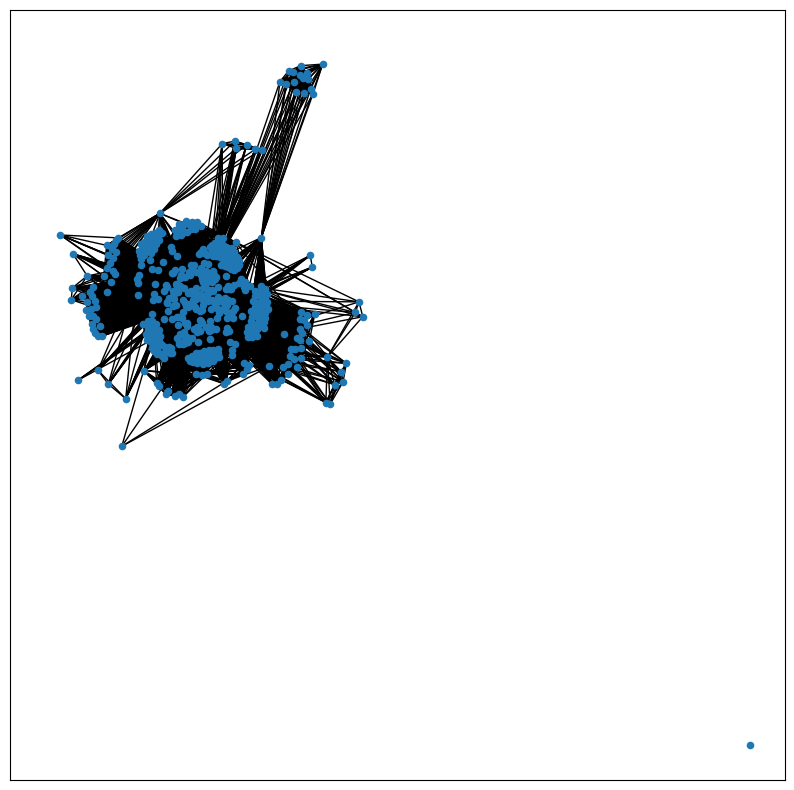

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
nx.draw_networkx(G, node_size=20, with_labels=False)
plt.show()


In [79]:
import gzip
from collections import defaultdict

# Create mapping: gene → GO terms
gene_to_go = defaultdict(set)

with gzip.open("goa_human.gaf.gz", 'rt') as f:
    for line in f:
        if line.startswith("!"):
            continue  # skip header
        parts = line.strip().split('\t')
        if len(parts) > 4:
            gene = parts[2]
            go_term = parts[4]
            gene_to_go[gene].add(go_term)

print(f"✅ Parsed GO annotations for {len(gene_to_go)} genes.")


✅ Parsed GO annotations for 44614 genes.


In [80]:
# Build a sorted list of all unique GO terms
all_go_terms = sorted({term for terms in gene_to_go.values() for term in terms})
go_index = {term: i for i, term in enumerate(all_go_terms)}


In [81]:
import numpy as np

gene_to_go_vector = {}

for gene in genes_all:
    vec = np.zeros(len(all_go_terms))
    for term in gene_to_go.get(gene, []):
        vec[go_index[term]] = 1
    gene_to_go_vector[gene] = vec


In [82]:
# Combine GO and pathway vectors
gene_to_combined_vector = {}

for gene in genes_all:
    pathway_vec = gene_to_pathway_vector.get(gene, np.zeros(len(pathway_names)))
    go_vec = gene_to_go_vector.get(gene, np.zeros(len(all_go_terms)))
    combined_vec = np.concatenate([pathway_vec, go_vec])
    gene_to_combined_vector[gene] = combined_vec


In [83]:
!wget https://www.ebi.ac.uk/gwas/api/search/downloads/full -O gwas_catalog.tsv


--2025-06-04 12:30:48--  https://www.ebi.ac.uk/gwas/api/search/downloads/full
Resolving www.ebi.ac.uk (www.ebi.ac.uk)... 193.62.193.80
Connecting to www.ebi.ac.uk (www.ebi.ac.uk)|193.62.193.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/tsv]
Saving to: ‘gwas_catalog.tsv’

gwas_catalog.tsv        [     <=>            ] 391.75M  3.25MB/s    in 38s     

2025-06-04 12:31:28 (10.3 MB/s) - ‘gwas_catalog.tsv’ saved [410776502]



In [84]:
import pandas as pd

# Load with tab separator
gwas_data = pd.read_csv("gwas_catalog.tsv", sep="\t")

# Display a few rows to understand structure
gwas_data.head()


<ipython-input-84-c6c2970ee28d>:4: DtypeWarning: Columns (9,11,12,13,23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  gwas_data = pd.read_csv("gwas_catalog.tsv", sep="\t")


,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
0,2020-08-03,32352494,Han X,2020-04-30,JAMA Ophthalmol,www.ncbi.nlm.nih.gov/pubmed/32352494,Association of Myopia and Intraocular Pressure...,Spherical equivalent,"95,827 European ancestry individuals",NaN,...,intergenic_variant,1.0,NR,2.000000e-08,7.698970,NaN,0.07,[0.05-0.09] unit increase,NR [NR],N
1,2020-08-03,32352494,Han X,2020-04-30,JAMA Ophthalmol,www.ncbi.nlm.nih.gov/pubmed/32352494,Association of Myopia and Intraocular Pressure...,Retinal detachment,"4,257 European ancestry cases, 39,181 European...",NaN,...,intron_variant,0.0,0.37,1.000000e-15,15.000000,NaN,0.20,[0.16-0.24] unit decrease,NR [NR],N
2,2020-08-03,32352494,Han X,2020-04-30,JAMA Ophthalmol,www.ncbi.nlm.nih.gov/pubmed/32352494,Association of Myopia and Intraocular Pressure...,Spherical equivalent,"95,827 European ancestry individuals",NaN,...,intergenic_variant,1.0,NR,5.000000e-16,15.301030,NaN,0.11,[0.09-0.13] unit increase,NR [NR],N
3,2020-08-03,32352494,Han X,2020-04-30,JAMA Ophthalmol,www.ncbi.nlm.nih.gov/pubmed/32352494,Association of Myopia and Intraocular Pressure...,Spherical equivalent,"95,827 European ancestry individuals",NaN,...,intron_variant,0.0,NR,6.000000e-10,9.221849,NaN,0.20,[0.14-0.26] unit increase,NR [NR],N
4,2020-08-03,32352494,Han X,2020-04-30,JAMA Ophthalmol,www.ncbi.nlm.nih.gov/pubmed/32352494,Association of Myopia and Intraocular Pressure...,Spherical equivalent,"95,827 European ancestry individuals",NaN,...,missense_variant,0.0,NR,3.000000e-10,9.522879,NaN,0.08,[0.06-0.1] unit increase,NR [NR],N


In [85]:
# Some entries have multiple genes separated by commas — split them
from collections import defaultdict

gene_snp_counts = defaultdict(int)

for entry in gwas_data["MAPPED_GENE"].dropna():
    genes = [g.strip() for g in entry.split(",")]
    for gene in genes:
        gene_snp_counts[gene] += 1


In [86]:
import numpy as np

# Add snp_count as a new feature to your existing gene_features dictionary
for gene in gene_features:
    snp_count = gene_snp_counts.get(gene, 0)
    gene_features[gene] = np.append(gene_features[gene], snp_count)


In [87]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [88]:
class AttentionFusion(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_heads=4, output_dim=64):
        super(AttentionFusion, self).__init__()

        self.attention = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads, batch_first=True)
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Self-attention: query = key = value = x
        attn_output, _ = self.attention(x, x, x)
        x = F.relu(self.linear1(attn_output))
        out = self.linear2(x)
        return out


In [89]:
# Convert gene features into a tensor
import numpy as np
import torch

# Collect all feature vectors
features = [gene_features[gene] for gene in genes_all_sampled if gene in gene_features]

# Convert to tensor
X = torch.tensor(np.array(features), dtype=torch.float32)

# Add a batch dimension for attention layer: shape [batch_size, seq_len, input_dim]
X = X.unsqueeze(0)  # shape: [1, num_genes, feature_dim]


In [90]:
input_dim = X.shape[2]
model = AttentionFusion(input_dim=input_dim)

# Forward pass
with torch.no_grad():
    output = model(X)

print("✅ Attention fusion output shape:", output.shape)


✅ Attention fusion output shape: torch.Size([1, 500, 64])
